In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../../data/pima-indians-diabetes/diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

(768, 8) (768,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [9]:
models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(n_neighbors=2, weights="distance")))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(n_neighbors=2, radius=500.0)))

In [10]:
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0], results[i][1]))

name: KNN; score: 0.7207792207792207
name: KNN with weights; score: 0.6753246753246753
name: Radius Neighbors; score: 0.6753246753246753


In [11]:
from sklearn.model_selection import KFold, cross_val_score

In [12]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.7147641831852358
name: KNN with weights; cross val score: 0.6770505809979495
name: Radius Neighbors; cross val score: 0.6497265892002735


In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.8387622149837134; test score: 0.7207792207792207


In [17]:
from sklearn.model_selection import ShuffleSplit

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [19]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
cv

ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)

In [22]:
from sklearn.feature_selection import SelectKBest

In [23]:
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0: 5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [24]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights; cross val score: 0.6900375939849623
name: Radius Neighbors; cross val score: 0.6510252904989747


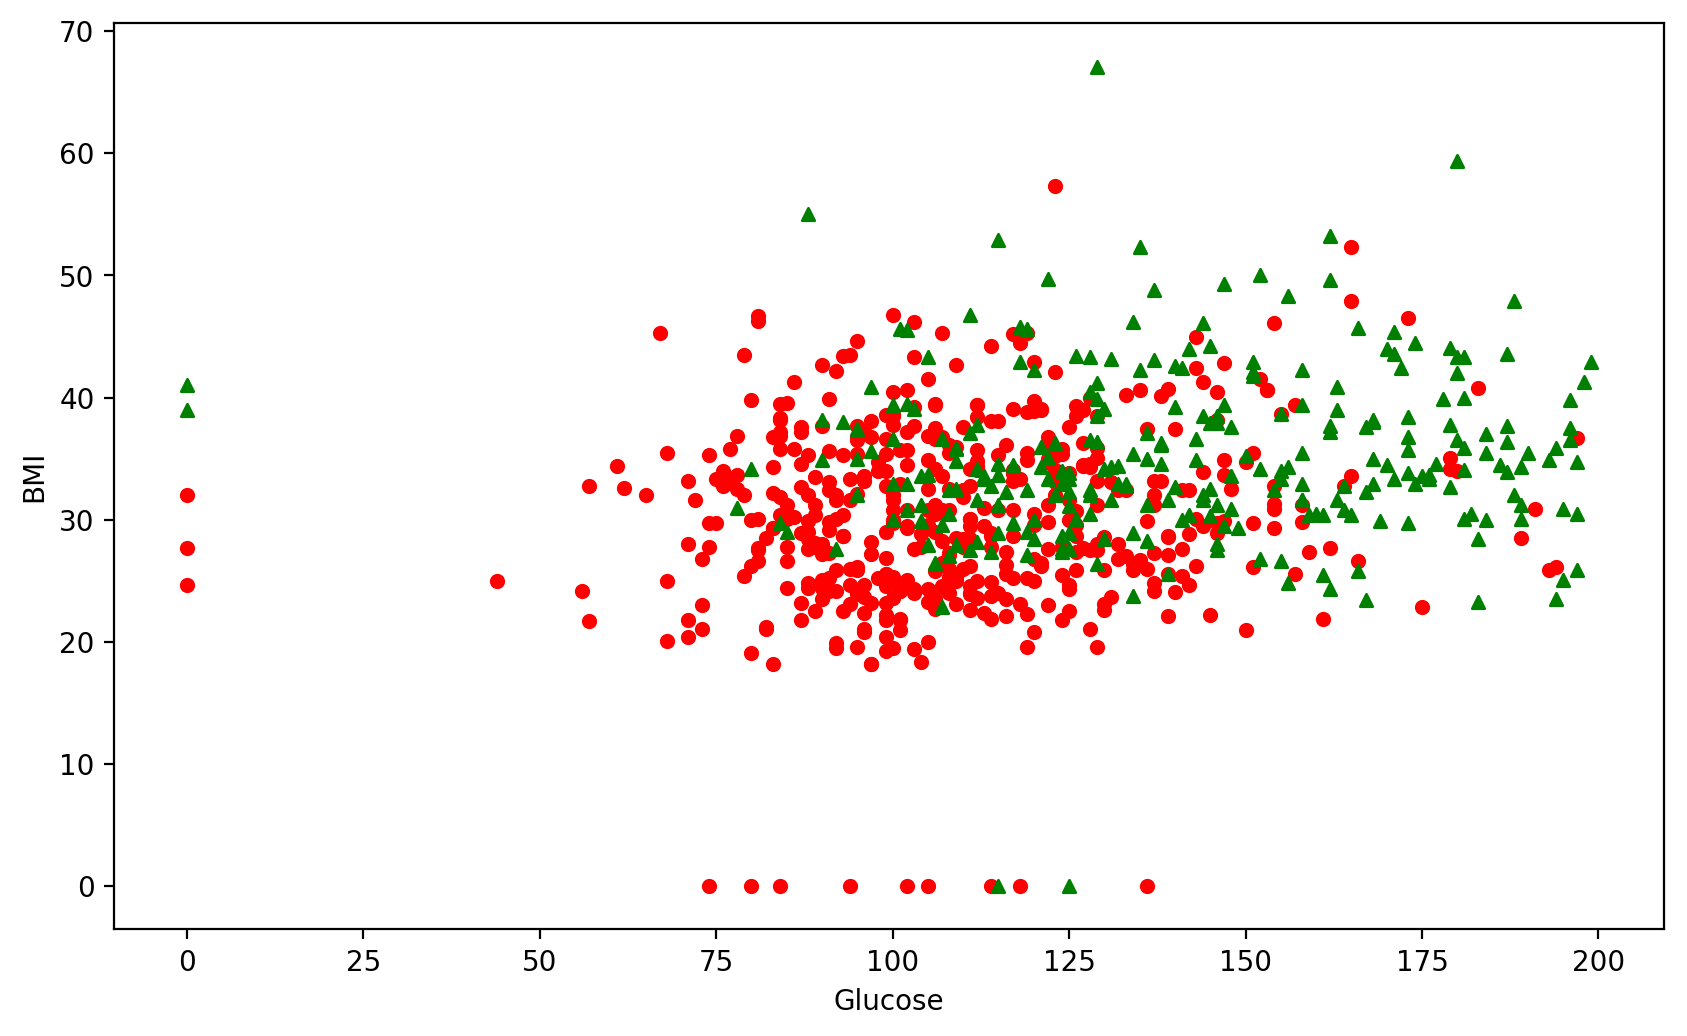

In [25]:
plt.figure(figsize=(10, 6), dpi=200)
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='r', s=20, marker='o')
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='g', s=20, marker='^')